In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [6]:
# Load dataset
file_path = r"/content/TASK-ML-INTERN.csv"
df = pd.read_csv(file_path)

In [7]:
# Display basic information about the dataset
df.info(),

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Columns: 450 entries, hsi_id to vomitoxin_ppb
dtypes: float64(449), object(1)
memory usage: 1.7+ MB


(None,)

In [8]:
df.sample(5)

,hsi_id,0,1,2,3,4,5,6,7,8,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
416,imagoai_corn_416,0.470883,0.487074,0.484065,0.473720,0.448887,0.476775,0.449860,0.435453,0.446299,...,0.744322,0.737666,0.747675,0.738318,0.752469,0.755641,0.741787,0.748669,0.763863,0.0
9,imagoai_corn_9,0.439308,0.430286,0.419468,0.402224,0.401832,0.399487,0.362857,0.351145,0.351157,...,0.700342,0.705466,0.705582,0.688853,0.715501,0.706368,0.690124,0.698683,0.689356,1100.0
342,imagoai_corn_342,0.412768,0.410260,0.368003,0.372989,0.344537,0.339842,0.349644,0.337373,0.346768,...,0.674267,0.681740,0.685220,0.668501,0.662377,0.677443,0.673667,0.666009,0.653914,300.0
57,imagoai_corn_57,0.513916,0.500465,0.491258,0.497288,0.511909,0.487890,0.485503,0.490692,0.489272,...,0.781958,0.799564,0.777352,0.797355,0.785396,0.788052,0.774678,0.793020,0.771940,900.0
203,imagoai_corn_203,0.458720,0.469803,0.439395,0.446733,0.459010,0.425430,0.417149,0.413254,0.422913,...,0.774215,0.767069,0.757105,0.760177,0.763650,0.756640,0.749724,0.771918,0.755662,1400.0


In [9]:
df.shape

(500, 450)

In [10]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.443118,0.440761,0.433814,0.426122,0.418990,0.412432,0.405868,0.399815,0.394038,0.389664,...,0.741255,0.740818,0.740459,0.739758,0.739850,0.738738,0.738298,0.737599,0.738099,3410.006000
std,0.044719,0.045520,0.045764,0.046070,0.045405,0.044727,0.044528,0.043773,0.043659,0.043442,...,0.053479,0.053695,0.053812,0.053666,0.053487,0.053601,0.054014,0.054136,0.054297,13095.803483
min,0.311182,0.295321,0.284064,0.282054,0.296702,0.286860,0.262876,0.278523,0.255529,0.261459,...,0.562662,0.585011,0.558412,0.571735,0.575259,0.571767,0.577803,0.576985,0.562302,0.000000
25%,0.410456,0.404310,0.397038,0.389029,0.382102,0.377157,0.369620,0.364823,0.360634,0.355246,...,0.702105,0.703701,0.702988,0.700889,0.701690,0.700638,0.698655,0.698107,0.699673,137.500000
50%,0.449105,0.442651,0.434215,0.425074,0.417075,0.411872,0.405443,0.397917,0.393803,0.387211,...,0.743857,0.745922,0.745062,0.743991,0.744004,0.743965,0.743301,0.745216,0.745733,500.000000
75%,0.480245,0.478822,0.473158,0.464947,0.459232,0.452198,0.444384,0.438728,0.431165,0.427039,...,0.777884,0.776210,0.777069,0.774759,0.775698,0.775686,0.775621,0.774635,0.774310,1700.000000
max,0.556287,0.530168,0.528774,0.533202,0.511909,0.501786,0.504054,0.490692,0.489272,0.472080,...,0.940642,0.940361,0.939153,0.930366,0.942615,0.945225,0.932812,0.931381,0.957860,131000.000000


In [11]:
df.isnull().sum()

,0
hsi_id,0
0,0
1,0
2,0
3,0
...,...
444,0
445,0
446,0
447,0


In [12]:
# Identify and remove non-numeric columns
non_numeric_cols = df.select_dtypes(include=['object']).columns
df = df.drop(columns=non_numeric_cols)

In [13]:
# Define target column
target_column = "vomitoxin_ppb"

In [14]:
# Ensure target column exists
if target_column not in df.columns:
    raise ValueError(f"Target column '{target_column}' not found in dataset.")

In [15]:
# Separate features and target
features = df.drop(columns=[target_column]).copy()
target = df[target_column].copy()

In [16]:
# Handle missing values
features.fillna(features.mean(), inplace=True)
target.fillna(target.mean(), inplace=True)

X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42
)


In [17]:
# ----- Feature Scaling -----
# Scale features
scaler_x = StandardScaler()
X_train_scaled = scaler_x.fit_transform(X_train)
X_test_scaled = scaler_x.transform(X_test)


In [18]:
# Scale target
scaler_y = MinMaxScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()


In [19]:
# ----- Random Forest Model -----
# Build and train Random Forest
print("Training Random Forest model...")
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train_scaled)


Training Random Forest model...


RandomForestRegressor(random_state=42)

In [20]:
# Predict with Random Forest
y_pred_rf_scaled = rf_model.predict(X_test_scaled)


In [21]:
# ----- LSTM Model -----
# Reshape input data for LSTM (samples, timesteps, features)
X_train_lstm = np.expand_dims(X_train_scaled, axis=-1)
X_test_lstm = np.expand_dims(X_test_scaled, axis=-1)


In [22]:
# Build LSTM architecture
print("Training LSTM model...")
lstm_model = Sequential([
    LSTM(64, activation='relu', return_sequences=True, input_shape=(X_train_lstm.shape[1], 1)),
    Dropout(0.2),
    LSTM(32, activation='relu'),
    Dense(1)
])

Training LSTM model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
# Compile and train LSTM
lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.fit(X_train_lstm, y_train_scaled, epochs=10, batch_size=16, verbose=1)


Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 303ms/step - loss: 0.0073
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 300ms/step - loss: 0.0050
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 249ms/step - loss: 0.0089
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 252ms/step - loss: 0.0119
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 245ms/step - loss: 0.0107
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 262ms/step - loss: 0.0070
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 294ms/step - loss: 0.0091
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 248ms/step - loss: 0.0125
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 249ms/step - loss: 0.0078
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 303ms/step - loss: 0.0149


In [24]:
# Predict with LSTM
y_pred_lstm_scaled = lstm_model.predict(X_test_lstm).flatten()


3/4 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 189ms/step


In [25]:
# ----- Inverse Transform Predictions -----
y_test_original = scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1)).flatten()
y_pred_rf = scaler_y.inverse_transform(y_pred_rf_scaled.reshape(-1, 1)).flatten()
y_pred_lstm = scaler_y.inverse_transform(y_pred_lstm_scaled.reshape(-1, 1)).flatten()


In [26]:
# ----- Model Evaluation -----
# Evaluate Random Forest
rf_mae = mean_absolute_error(y_test_original, y_pred_rf)
rf_rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_rf))
rf_r2 = r2_score(y_test_original, y_pred_rf)

In [27]:
print("\nRandom Forest Performance:")
print(f"Mean Absolute Error (MAE): {rf_mae}")
print(f"Root Mean Squared Error (RMSE): {rf_rmse}")
print(f"R² Score: {rf_r2}")


Random Forest Performance:
Mean Absolute Error (MAE): 3749.9007000000006
Root Mean Squared Error (RMSE): 11314.701435248173
R² Score: 0.5420132262870516


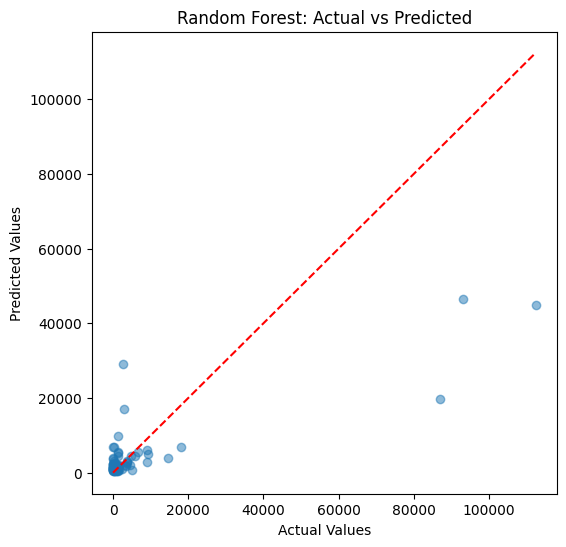

In [28]:
# Visualize Random Forest results
plt.figure(figsize=(6, 6))
plt.scatter(y_test_original, y_pred_rf, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest: Actual vs Predicted")
plt.plot([min(y_test_original), max(y_test_original)], [min(y_test_original), max(y_test_original)], 'r--')
plt.show()

In [29]:
# Evaluate LSTM
lstm_mae = mean_absolute_error(y_test_original, y_pred_lstm)
lstm_rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_lstm))
lstm_r2 = r2_score(y_test_original, y_pred_lstm)

print("\nLSTM Model Performance:")
print(f"Mean Absolute Error (MAE): {lstm_mae}")
print(f"Root Mean Squared Error (RMSE): {lstm_rmse}")
print(f"R² Score: {lstm_r2}")



LSTM Model Performance:
Mean Absolute Error (MAE): 5266.027242431641
Root Mean Squared Error (RMSE): 16767.373231244987
R² Score: -0.005765657093623089


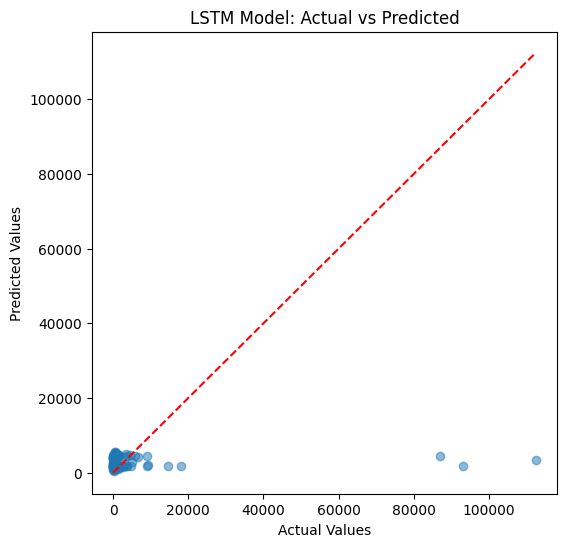

In [30]:
# Visualize LSTM results
plt.figure(figsize=(6, 6))
plt.scatter(y_test_original, y_pred_lstm, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("LSTM Model: Actual vs Predicted")
plt.plot([min(y_test_original), max(y_test_original)], [min(y_test_original), max(y_test_original)], 'r--')
plt.show()